# ATMOS 2022 - DMSP Analysis

-----------

## 0. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import proplot

from data import *
from utils import *
from visualization_codes import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## 1. Calculate Hight Light Fraction

In [2]:
# province names
provinces = ['istanbul', 'ankara', 'izmir']

# define land-use index correspondence of name
indexes = define_index_correspondence()
    
# years in data
years = np.arange(1992, 2014)

# define which land cover is used for the calculation
total_grid_use = np.arange(0, 64)
hight_light_grid_use = np.arange(50, 64)

Assuming that higher than 50 bit light data corresponds to urban areas

In [3]:
# calculation of relative high light intensity 
province_high_light_percent = {}
for province in provinces:
    
    # open specific province corine data
    dt = retrieve_dmsp(province)

    # find high intensity light percentages relative to total grid
    high_light_percent = {}
    for year in years:

        # find total grid amount in single year data
        total_grid_amount = find_grid_amount(dt,
                                             total_grid_use,
                                             year)

        # find urban grid amount in single year data
        high_light_grid_amount = find_grid_amount(dt,
                                             hight_light_grid_use,
                                             year)

        # calculate percent representation of urban LU relative to whole LU
        high_light_percent[year] = (high_light_grid_amount / total_grid_amount) * 100 
    
    province_high_light_percent[province] = high_light_percent

In [4]:
province_high_light_percent_df = pd.DataFrame(province_high_light_percent)

In [5]:
province_high_light_percent_df.head(4)

,istanbul,ankara,izmir
1992,3.928331,0.587544,0.393434
1993,4.170213,0.530926,0.494215
1994,5.321389,0.634548,0.736477
1995,5.585666,0.722145,0.794620


In [6]:
# get the tranpose for easier plotting
province_high_light_percent_df_tpose = province_high_light_percent_df \
            .transpose()\
            .reset_index()\
            .rename(columns={'index': 'Province'})

In [7]:
province_high_light_percent_df_tpose

,Province,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,istanbul,3.928331,4.170213,5.321389,5.585666,4.788354,5.218365,5.272116,6.275476,7.399776,...,6.530795,5.787234,7.086226,8.658455,8.058231,8.183651,10.727884,9.151176,11.256439,10.911534
1,ankara,0.587544,0.530926,0.634548,0.722145,0.703985,0.548018,0.668732,0.690097,0.905886,...,0.806538,0.722145,1.052238,1.276573,1.286187,1.154791,1.684649,1.707083,2.030766,1.913257
2,izmir,0.393434,0.494215,0.736477,0.794620,0.769425,0.573677,0.664767,0.676396,0.920596,...,0.907029,0.732601,0.903153,1.294649,1.314030,1.147354,1.961354,1.889645,1.971045,2.075702


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/ui.py:406: ProPlotWarning: You specified both figsize=(6, 4) and axwidth=1.5. Ignoring 'axwidth'.
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xn

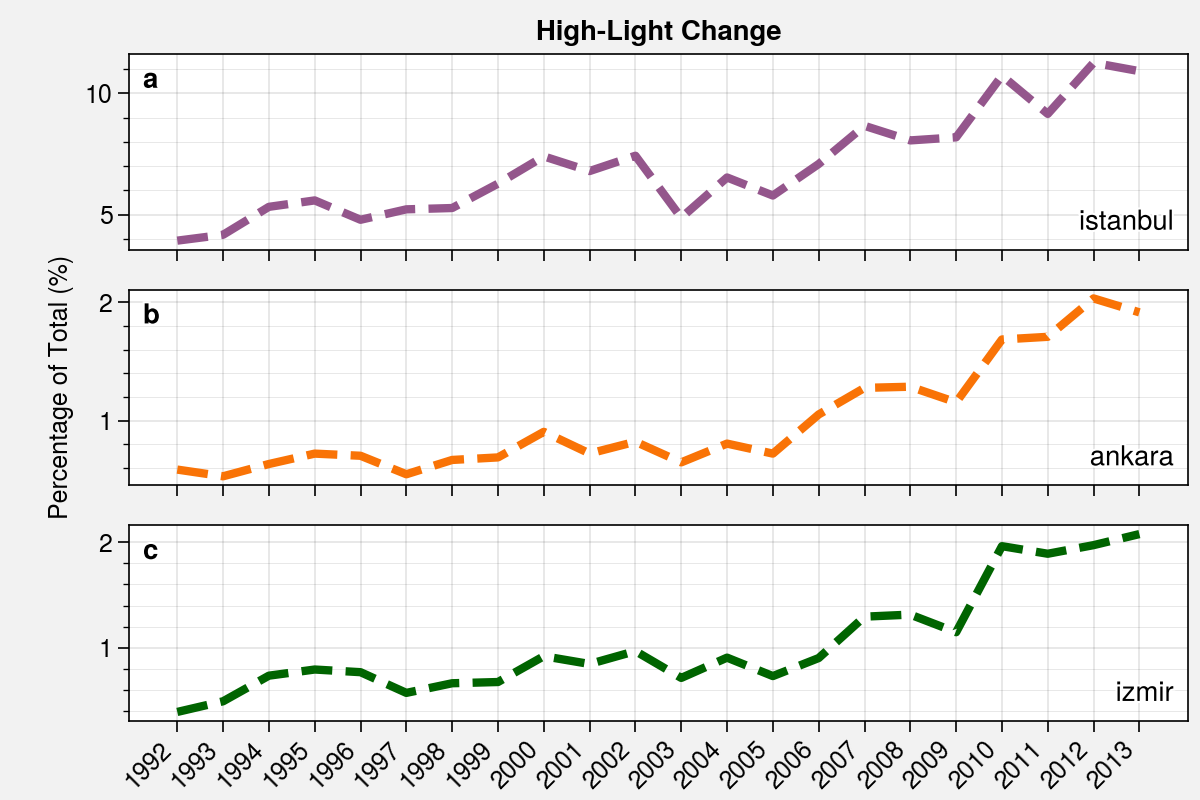

In [8]:
method = 'dmsp_lineplot'
suptitle='High-Light Change'
line_plot(province_high_light_percent_df_tpose, method, suptitle)

### Problem statetment: Why outside of city is not np.nan??

In [68]:
total_grid_amount = find_grid_amount(dt,
                                             total_grid_use,
                                             year)

In [69]:
total_grid_amount

array(12920)